In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df1=pd.read_csv("iris.csv",header=None,names=['sepal length','sepal width','petal length','petal width','class'])

In [48]:
df1.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [9]:
df1.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


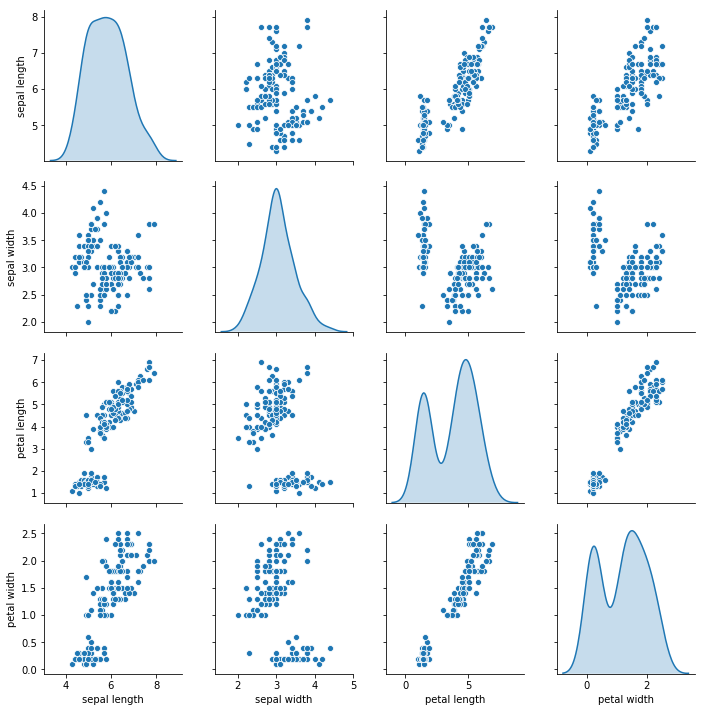

In [10]:
sns.pairplot(df1,diag_kind='kde') # the preliminary analysis reveals that weight, shell weight and rings are the most important features as they show  two peaks in the density plot

In [11]:
df2=df1.drop('class',axis=1)

In [12]:
df2.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
from scipy.stats import zscore
df_scaled =df2.apply(zscore)

In [14]:
df_scaled

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


In [ ]:
# with the use of the average in iris we get 0.85, with complete 0.75, with ward 0.82

In [17]:
z=linkage(df_scaled,'ward')
c,coph_dists=cophenet(z,pdist(df_scaled))  
c

0.8225754331448963

In [18]:
from sklearn.cluster import KMeans

In [19]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:  # to generate the clusters
    clusters=KMeans(num_clusters)
    clusters.fit(df_scaled)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({"num_clusters":cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.425177
4,5,91.066771
5,6,80.166732
6,7,71.300706
7,8,62.482249
8,9,54.418877
9,10,48.057082


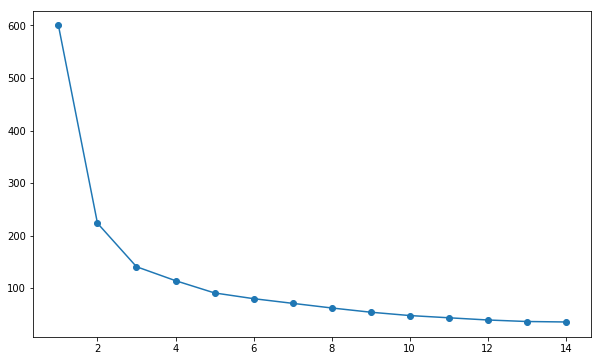

In [21]:
# Elbow Plot

plt.figure(figsize=(10,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')


In [22]:
# At one point the graph almost saturates. Now we are calculating the difference between the two consecutive numbers.

d1=600.000000-223.732006
d1

376.267994

In [23]:
d2=223.732006-140.965817
d2

82.76618900000003

In [24]:
d3=140.965817-114.425177
d3

26.540639999999982

In [25]:
d4=114.425177-91.066771

d4

23.358406000000002

In [26]:
d5=91.066771-80.166732
d5

10.900039000000007

In [102]:
# If we remove another differences between d1,d2,d3,d4,and d5 we see that difference between d4 and d5 are negligible as compared to others hence we stop before d4 and hence we deduce k=3
# we still have to do further more analysis . 

In [27]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2) # the enitre result dependes upon the initial centroid value taken. Take 15 random combinations and do the kmeans process. once done please print the best result out of those.

In [28]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [29]:
centroids=kmeans.cluster_centers_

In [30]:
centroids

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [31]:
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))

In [32]:
centroid_df # Here the sepal width will be removed as it is not a significant feature

,sepal length,sepal width,petal length,petal width
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


In [33]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D Plot of KMeans Clustering')

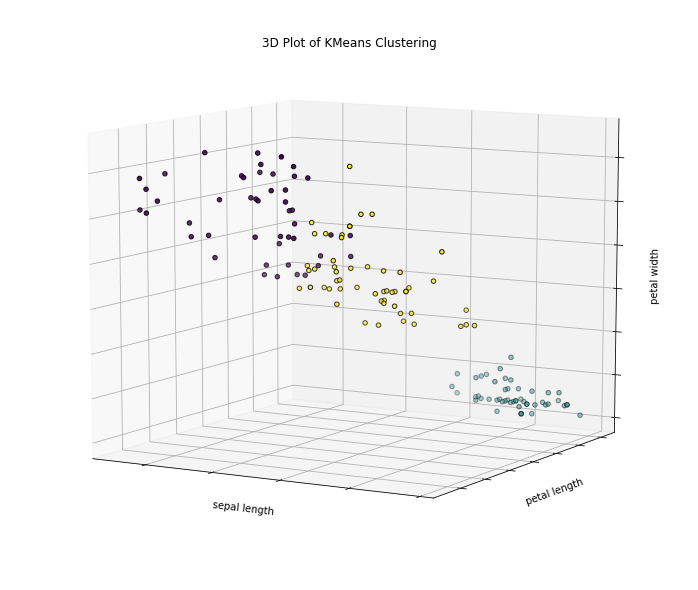

In [34]:
fig=plt.figure(figsize=(10,8))
ax=Axes3D(fig,rect=[0,0,.95,1],elev=10,azim=120) # azimuth changes the image from left to right and the elevation will help to turn the image for a top-view position.
kmeans.fit(df_scaled)
labels=kmeans.labels_
ax.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,2],df_scaled.iloc[:,3],c=labels.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])  # c stands for color option
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('sepal length')
ax.set_ylabel('petal length')
ax.set_zlabel('petal width')
ax.set_title('3D Plot of KMeans Clustering')


In [35]:
# to generate the labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [36]:
# create a new dataframe only for labels and converting it into categorical variable
df_labels=pd.DataFrame(kmeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [39]:
df_labels['labels'].value_counts() #class 0 is verginica, class 1 is sentosa and class 2 is versicolor.

2    53
1    50
0    47
Name: labels, dtype: int64

In [45]:
iris_df_labeled=df2.join(df_labels)

In [72]:
df_scaled['labels']=df_labels
iris_clusters=df_scaled.groupby(['labels'])
df10=iris_clusters.get_group(0)
df11=iris_clusters.get_group(1)
df12=iris_clusters.get_group(2)

In [75]:
df10.iloc[0,:-1]


sepal length    1.401508
sepal width     0.337848
petal length    0.535296
petal width     0.264699
Name: 50, dtype: float64

In [69]:
df11.shape

(50, 5)

In [73]:
df12.shape

(53, 5)

In [89]:
c0=kmeans.cluster_centers_[0,:] # Centroid for class 0
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]
print(c0)
print(c1)
print(c2)

[1.13597027 0.09659843 0.996271   1.01717187]
[-1.01457897  0.84230679 -1.30487835 -1.25512862]
[-0.05021989 -0.88029181  0.34753171  0.28206327]


In [90]:
I0=0
I1=0
I2=0
for i in np.arange(df10.shape[0]):
    I0=I0+np.sum((df10.iloc[i,:-1]-c0)**2)# The inertia is calculate for all the records of class 0
    I1=I1+np.sum((df11.iloc[i,:-1]-c1)**2)
    I2=I2+np.sum((df12.iloc[i,:-1]-c2)**2)
    print(I0)
    print(I1)
    print(I2)

0.9074256576939965
0.05364886503531076
0.9475160466719107
1.8945095629638256
1.0104165089173307
1.7787720527373958
2.4216685043293196
1.414411760503823
1.9072191406792898
3.4366699131979925
2.201675787979127
4.167443333738553
4.411463220058706
2.3837697557237627
5.416433034125001
5.823455565254483
3.9157904867247932
6.023715009985021
6.8856611824453555
4.166277060242023
9.937090268210364
8.084070839223603
4.171830339813552
10.544098347280668
8.355277274737118
6.1524678544320555
12.142047627675046
10.31607828757474
6.746717761141535
12.582586486431719
10.92391158583163
7.404225164194786
13.130715484439838
12.045478288721272
7.47759063001553
13.779586753968879
12.321300246191656
8.512661097390385
14.10199641849954
12.919859230917004
10.258735748161257
15.554167437127589
13.201414108350262
13.023980710786644
16.016295375887385
14.647563983826764
18.937283939293565
16.298723074030374
15.501258036125762
20.459991590418838
16.92826714533215
17.489727769482943
20.515714672475635
17.2581471910

In [91]:
total_inertia=I0+I1+I2
total_inertia

134.93276835158213

In [40]:
from sklearn.cluster import AgglomerativeClustering


In [41]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward') # if we do not specify euclidean then it goes ward

In [42]:
model.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [43]:
l=pd.DataFrame(model.labels_)

In [44]:
l[0].value_counts() # class 0 is viginica, class 1 is versicolor , class 2 is versicolor

0    71
1    49
2    30
Name: 0, dtype: int64

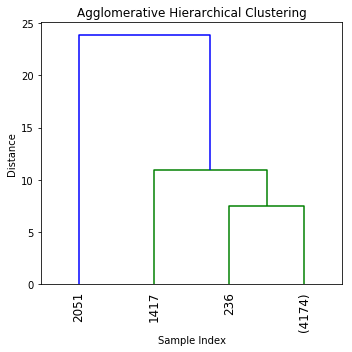

In [19]:
plt.figure(figsize=(5,5))
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90,p=2,truncate_mode='level') # p and truncate_mode are the two most important arguments.
plt.tight_layout()

In [54]:
d=((.535296-1.401508)**2)+((0.264699-0.337848)**2)
d

0.7556740051449999

In [59]:
df_scaled['labels']=model.labels_
iris_clusters=df_scaled.groupby(['labels'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)

In [60]:
df0.shape

(71, 5)

In [61]:
df1.shape

(49, 5)

In [62]:
df2.shape

(30, 5)